In [117]:
using PyPlot

In [118]:
function rho(X, Y)
    l_X = length(X)
    l_Y = length(Y)
    mesh = zeros(Float64, l_X, l_Y)
    for i_x in 2:l_X-1
        for i_y in 2:l_Y-1
            mesh[i_x,i_y] = e^-((X[i_x]-2)^2+Y[i_y]^2)-e^-((X[i_x]+2)^2+Y[i_y]^2)
        end
    end
    return mesh
end

rho (generic function with 1 method)

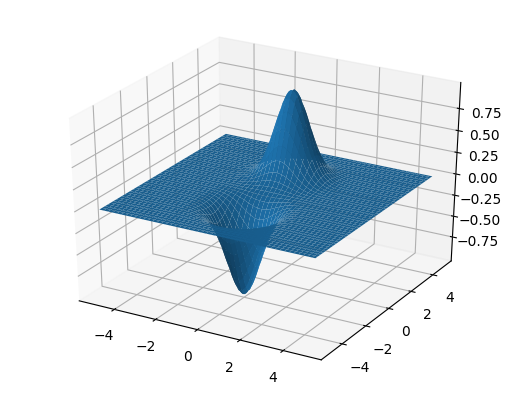

In [119]:
resolution = .01
x = linspace(-5,5,Int(10/resolution)+1)
y = linspace(-5,5,Int(10/resolution)+1)
X = repeat(x', outer=[length(x),1])
Y = repeat(y, outer=[1,length(y)])
Z = rho(x,y)

plot_surface(X,Y,Z)
show()